# Computer Vision Nanodegree

## Project: Image Captioning

---

In this notebook, you will use your trained model to generate captions for images in the test dataset.

This notebook **will be graded**.  

Feel free to use the links below to navigate the notebook:
- [Step 1](#step1): Get Data Loader for Test Dataset 
- [Step 2](#step2): Load Trained Models
- [Step 3](#step3): Finish the Sampler
- [Step 4](#step4): Clean up Captions
- [Step 5](#step5): Generate Predictions!

<a id='step1'></a>
## Step 1: Get Data Loader for Test Dataset

Before running the code cell below, define the transform in `transform_test` that you would like to use to pre-process the test images.  

Make sure that the transform that you define here agrees with the transform that you used to pre-process the training images (in **2_Training.ipynb**).  For instance, if you normalized the training images, you should also apply the same normalization procedure to the test images.

In [1]:
import sys
sys.path.append('./opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from torchvision import transforms

# TODO #1: Define a transform to pre-process the testing images.
transform_test = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])


#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Create the data loader.
data_loader = get_loader(transform=transform_test,    
                         mode='test')

test!@!!!!!!!!!!
Vocabulary successfully loaded from vocab.pkl file!


Run the code cell below to visualize an example test image, before pre-processing is applied.

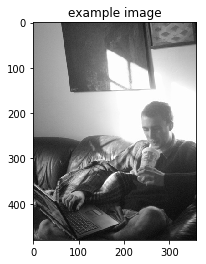

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Obtain sample image before and after pre-processing.
orig_image, image = next(iter(data_loader))

# Visualize sample image, before pre-processing.
plt.imshow(np.squeeze(orig_image))
plt.title('example image')
plt.show()

<a id='step2'></a>
## Step 2: Load Trained Models

In the next code cell we define a `device` that you will use move PyTorch tensors to GPU (if CUDA is available).  Run this code cell before continuing.

In [3]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Before running the code cell below, complete the following tasks.

### Task #1

In the next code cell, you will load the trained encoder and decoder from the previous notebook (**2_Training.ipynb**).  To accomplish this, you must specify the names of the saved encoder and decoder files in the `models/` folder (e.g., these names should be `encoder-5.pkl` and `decoder-5.pkl`, if you trained the model for 5 epochs and saved the weights after each epoch).  

### Task #2

Plug in both the embedding size and the size of the hidden layer of the decoder corresponding to the selected pickle file in `decoder_file`.

In [5]:
# Watch for any changes in model.py, and re-load it automatically.
% load_ext autoreload
% autoreload 2

import os
import torch
from model import EncoderCNN, DecoderRNN

# TODO #2: Specify the saved models to load.
encoder_file = 'encoder-2.pkl' 
decoder_file = 'decoder-2.pkl'

# TODO #3: Select appropriate values for the Python variables below.
embed_size = 256
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

# Load the trained weights.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))

# Move models to GPU if CUDA is available.
encoder.to(device)
decoder.to(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


DecoderRNN(
  (embed): Embedding(8855, 256)
  (lstm): LSTM(256, 512, num_layers=3, batch_first=True, dropout=0.4)
  (linear): Linear(in_features=512, out_features=8855, bias=True)
)

<a id='step3'></a>
## Step 3: Finish the Sampler

Before executing the next code cell, you must write the `sample` method in the `DecoderRNN` class in **model.py**.  This method should accept as input a PyTorch tensor `features` containing the embedded input features corresponding to a single image.

It should return as output a Python list `output`, indicating the predicted sentence.  `output[i]` is a nonnegative integer that identifies the predicted `i`-th token in the sentence.  The correspondence between integers and tokens can be explored by examining either `data_loader.dataset.vocab.word2idx` (or `data_loader.dataset.vocab.idx2word`).

After implementing the `sample` method, run the code cell below.  If the cell returns an assertion error, then please follow the instructions to modify your code before proceeding.  Do **not** modify the code in the cell below. 

In [6]:
# Move image Pytorch Tensor to GPU if CUDA is available.
image = image.to(device)

# Obtain the embedded image features.
features = encoder(image).unsqueeze(1)

# Pass the embedded image features through the model to get a predicted caption.
output = decoder.sample(features)
print('example output:', output)

assert (type(output)==list), "Output needs to be a Python list" 
assert all([type(x)==int for x in output]), "Output should be a list of integers." 
assert all([x in data_loader.dataset.vocab.idx2word for x in output]), "Each entry in the output needs to correspond to an integer that indicates a token in the vocabulary."

hidden st: None
predicted is : tensor([ 0], device='cuda:0')
hidden st: (tensor([[[-0.7616, -0.7616, -0.7616,  ...,  0.7616,  0.7616, -0.7616]],

        [[ 0.7527,  0.7603,  0.7594,  ...,  0.7381, -0.7584,  0.0017]],

        [[ 0.7346, -0.7572, -0.7581,  ...,  0.7589,  0.0001,  0.7608]]], device='cuda:0'), tensor([[[-1.0000e+00, -1.0000e+00, -1.0000e+00,  ...,  1.0000e+00,
           1.0000e+00, -1.0000e+00]],

        [[ 9.9144e-01,  9.9896e-01,  9.9808e-01,  ...,  9.8865e-01,
          -9.9759e-01,  9.5800e-01]],

        [[ 9.9829e-01, -9.9702e-01, -9.9861e-01,  ...,  9.9774e-01,
           3.7364e-03,  9.9940e-01]]], device='cuda:0'))
predicted is : tensor([ 3], device='cuda:0')
hidden st: (tensor([[[-9.4519e-01, -9.2372e-01, -9.5862e-01,  ...,  9.4944e-01,
           9.3274e-01, -9.4090e-01]],

        [[ 9.6336e-01,  9.6393e-01,  9.6382e-01,  ...,  9.6286e-01,
          -9.6376e-01,  7.6928e-05]],

        [[ 1.8459e-02, -9.6159e-01, -9.6350e-01,  ...,  9.6276e-01,
           2

           1.0738e+01,  1.0000e+00]]], device='cuda:0'))
predicted is : tensor([ 1], device='cuda:0')
hidden st: (tensor([[[-7.3192e-01, -6.1304e-02, -8.8738e-01,  ...,  9.7426e-01,
           7.3834e-02, -4.2324e-02]],

        [[ 9.9996e-01,  9.9993e-01,  9.9949e-01,  ...,  9.9958e-01,
          -9.9992e-01,  3.4161e-03]],

        [[ 4.6762e-03, -9.9993e-01, -9.9994e-01,  ..., -9.9972e-01,
           1.5650e-03,  7.6161e-01]]], device='cuda:0'), tensor([[[-1.1874e+01, -9.8409e+00, -1.2010e+01,  ...,  1.2122e+01,
           1.0068e+01, -1.1714e+01]],

        [[ 1.2938e+01,  1.2980e+01,  1.2939e+01,  ...,  1.2956e+01,
          -1.2954e+01,  1.2833e+01]],

        [[ 1.0082e+00, -1.2576e+01, -1.2926e+01,  ..., -6.7701e+00,
           1.1721e+01,  1.0000e+00]]], device='cuda:0'))
predicted is : tensor([ 1], device='cuda:0')
hidden st: (tensor([[[-6.7947e-01, -6.4432e-02, -8.3649e-01,  ...,  9.6188e-01,
           8.2547e-02, -4.3625e-02]],

        [[ 9.9995e-01,  9.9993e-01,  9.9945e

<a id='step4'></a>
## Step 4: Clean up the Captions

In the code cell below, complete the `clean_sentence` function.  It should take a list of integers (corresponding to the variable `output` in **Step 3**) as input and return the corresponding predicted sentence (as a single Python string). 

In [7]:
# TODO #4: Complete the function.
def clean_sentence(output):
    sentence=''
    for word_token in output:
        if word_token == 0 or word_token == 1 or word_token ==2:
            continue
        sentence+=data_loader.dataset.vocab.idx2word[word_token] + " "
        
    return sentence

After completing the `clean_sentence` function above, run the code cell below.  If the cell returns an assertion error, then please follow the instructions to modify your code before proceeding.

In [8]:
sentence = clean_sentence(output)
print('example sentence:', sentence)

assert type(sentence)==str, 'Sentence needs to be a Python string!'

example sentence: a man a a a a a a a 


<a id='step5'></a>
## Step 5: Generate Predictions!

In the code cell below, we have written a function (`get_prediction`) that you can use to use to loop over images in the test dataset and print your model's predicted caption.

In [11]:
def get_prediction():
    orig_image, image = next(iter(data_loader))
    plt.imshow(np.squeeze(orig_image))
    plt.title('Sample Image')
    plt.show()
    image = image.to(device)
    features = encoder(image).unsqueeze(1)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)

Run the code cell below (multiple times, if you like!) to test how this function works.

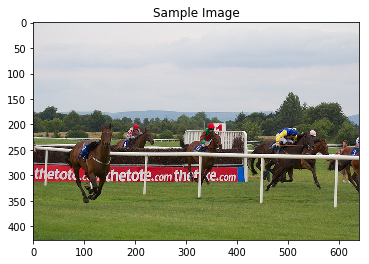

hidden st: None
predicted is : tensor([ 0], device='cuda:0')
hidden st: (tensor([[[-7.6159e-01, -7.6159e-01, -7.6159e-01,  ...,  7.6159e-01,
           7.6159e-01, -7.6159e-01]],

        [[ 7.5266e-01,  7.6027e-01,  7.5935e-01,  ...,  7.3811e-01,
          -7.5842e-01,  1.7274e-03]],

        [[ 7.3464e-01, -7.5719e-01, -7.5805e-01,  ...,  7.5895e-01,
           5.2485e-05,  7.6079e-01]]], device='cuda:0'), tensor([[[-1.0000e+00, -1.0000e+00, -1.0000e+00,  ...,  1.0000e+00,
           1.0000e+00, -1.0000e+00]],

        [[ 9.9144e-01,  9.9896e-01,  9.9808e-01,  ...,  9.8865e-01,
          -9.9759e-01,  9.5800e-01]],

        [[ 9.9829e-01, -9.9702e-01, -9.9861e-01,  ...,  9.9774e-01,
           3.7364e-03,  9.9940e-01]]], device='cuda:0'))
predicted is : tensor([ 3], device='cuda:0')
hidden st: (tensor([[[-9.4519e-01, -9.2372e-01, -9.5862e-01,  ...,  9.4944e-01,
           9.3274e-01, -9.4090e-01]],

        [[ 9.6336e-01,  9.6393e-01,  9.6382e-01,  ...,  9.6286e-01,
          -9.6376

           1.0738e+01,  1.0000e+00]]], device='cuda:0'))
predicted is : tensor([ 1], device='cuda:0')
hidden st: (tensor([[[-7.3192e-01, -6.1304e-02, -8.8738e-01,  ...,  9.7426e-01,
           7.3834e-02, -4.2324e-02]],

        [[ 9.9996e-01,  9.9993e-01,  9.9949e-01,  ...,  9.9958e-01,
          -9.9992e-01,  3.4161e-03]],

        [[ 4.6762e-03, -9.9993e-01, -9.9994e-01,  ..., -9.9972e-01,
           1.5650e-03,  7.6161e-01]]], device='cuda:0'), tensor([[[-1.1874e+01, -9.8409e+00, -1.2010e+01,  ...,  1.2122e+01,
           1.0068e+01, -1.1714e+01]],

        [[ 1.2938e+01,  1.2980e+01,  1.2939e+01,  ...,  1.2956e+01,
          -1.2954e+01,  1.2833e+01]],

        [[ 1.0082e+00, -1.2576e+01, -1.2926e+01,  ..., -6.7701e+00,
           1.1721e+01,  1.0000e+00]]], device='cuda:0'))
predicted is : tensor([ 1], device='cuda:0')
hidden st: (tensor([[[-6.7947e-01, -6.4432e-02, -8.3649e-01,  ...,  9.6188e-01,
           8.2547e-02, -4.3625e-02]],

        [[ 9.9995e-01,  9.9993e-01,  9.9945e

In [12]:
get_prediction()

As the last task in this project, you will loop over the images until you find four image-caption pairs of interest:
- Two should include image-caption pairs that show instances when the model performed well.
- Two should highlight image-caption pairs that highlight instances where the model did not perform well.

Use the four code cells below to complete this task.

### The model performed well!

Use the next two code cells to loop over captions.  Save the notebook when you encounter two images with relatively accurate captions.

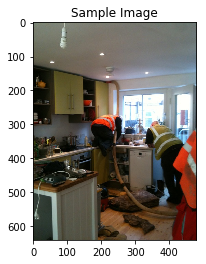

hidden st: None
predicted is : tensor([ 0], device='cuda:0')
hidden st: (tensor([[[-0.7616, -0.7616, -0.7616,  ...,  0.7616,  0.7616, -0.7616]],

        [[ 0.7527,  0.7603,  0.7594,  ...,  0.7381, -0.7584,  0.0017]],

        [[ 0.7346, -0.7572, -0.7581,  ...,  0.7589,  0.0001,  0.7608]]], device='cuda:0'), tensor([[[-1.0000e+00, -1.0000e+00, -1.0000e+00,  ...,  1.0000e+00,
           1.0000e+00, -1.0000e+00]],

        [[ 9.9144e-01,  9.9896e-01,  9.9808e-01,  ...,  9.8865e-01,
          -9.9759e-01,  9.5801e-01]],

        [[ 9.9829e-01, -9.9702e-01, -9.9861e-01,  ...,  9.9774e-01,
           3.7364e-03,  9.9940e-01]]], device='cuda:0'))
predicted is : tensor([ 3], device='cuda:0')
hidden st: (tensor([[[-9.4519e-01, -9.2372e-01, -9.5862e-01,  ...,  9.4944e-01,
           9.3274e-01, -9.4090e-01]],

        [[ 9.6336e-01,  9.6393e-01,  9.6382e-01,  ...,  9.6286e-01,
          -9.6376e-01,  7.6928e-05]],

        [[ 1.8459e-02, -9.6159e-01, -9.6350e-01,  ...,  9.6276e-01,
           2

           1.0738e+01,  1.0000e+00]]], device='cuda:0'))
predicted is : tensor([ 1], device='cuda:0')
hidden st: (tensor([[[-7.3192e-01, -6.1304e-02, -8.8738e-01,  ...,  9.7426e-01,
           7.3834e-02, -4.2324e-02]],

        [[ 9.9996e-01,  9.9993e-01,  9.9949e-01,  ...,  9.9958e-01,
          -9.9992e-01,  3.4161e-03]],

        [[ 4.6762e-03, -9.9993e-01, -9.9994e-01,  ..., -9.9972e-01,
           1.5650e-03,  7.6161e-01]]], device='cuda:0'), tensor([[[-1.1874e+01, -9.8409e+00, -1.2010e+01,  ...,  1.2122e+01,
           1.0068e+01, -1.1714e+01]],

        [[ 1.2938e+01,  1.2980e+01,  1.2939e+01,  ...,  1.2956e+01,
          -1.2954e+01,  1.2833e+01]],

        [[ 1.0082e+00, -1.2576e+01, -1.2926e+01,  ..., -6.7701e+00,
           1.1721e+01,  1.0000e+00]]], device='cuda:0'))
predicted is : tensor([ 1], device='cuda:0')
hidden st: (tensor([[[-6.7947e-01, -6.4432e-02, -8.3649e-01,  ...,  9.6188e-01,
           8.2547e-02, -4.3625e-02]],

        [[ 9.9995e-01,  9.9993e-01,  9.9945e

In [13]:
get_prediction()

In [ ]:
get_prediction()

### The model could have performed better ...

Use the next two code cells to loop over captions.  Save the notebook when you encounter two images with relatively inaccurate captions.

In [ ]:
get_prediction()

In [ ]:
get_prediction()